# Preconditioned steepest descent

## [Michel Bierlaire](https://people.epfl.ch/michel.bierlaire), EPFL.

We implement the preconditioned steepest descent algorithm to find a local minimum. This is Algorithm 11.1 in <a href="http://optimizationprinciplesalgorithms.com/">Bierlaire (2015) Optimization: principles and algorithms, EPFL Press.</a>

In [1]:
import numpy as np

In [2]:
def preconditionedSteepestDescent(fct, x0, D, eps, maxiter = 100):
    """
    :param fct: function that returns the value of the function, its gradient and hessian
    :type fct: f, g, H = fct(x)
    
    :param x0: starting point for the algorithm. 
    :type x0: 1D numpy.array
    
    :param D: preconditioner
    :type D: 2D numpy.array
    
    :param eps: precision to reach.
    :type eps: float.
    
    :param maxiter: maximum number of iterations. Default: 100.
    :type maxiter: int
    
    :return: iterates, message, where iterates is the list of iterates generated by the algorithm, and message the reason why it stopped. 
    """

    # All the iterates are stored for future display.
    iterates = [x0]
    k = 0
    x = x0
    f, g, H = fct(x)
    while np.linalg.norm(g) > eps and k <= maxiter:
        d = - D @ g
        alpha = - np.inner(d, g) / np.inner(d, H @ d)
        xplus = x + alpha * d
        iterates.append(xplus)
        x = xplus
        f, g, H = fct(x)
        k = k + 1
    if np.linalg.norm(g) <= eps:
        return iterates, f'Required precision has been reached: {np.linalg.norm(g)} <= {eps}'
    else:
        return iterates, f'Maximum number of iterations reached: {maxiter}'    

Consider the function $f:\mathbb{R}^2 \to \mathbb{R}$ defined as \\[ f(x_1,x_2)= x_1^2 + 11 x_2^2 + x_1 x_2 \\]
for wich the gradient is \\[ \nabla f(x_1,x_2) = \left( \begin{array}{c} 2x_1+x_2 \\ 22x_2+x_1 \end{array} \right) \\] and the hessian is \\[ \nabla^2 f(x_1,x_2) = \left(\begin{array}{cc} 2 & 1 \\ 1 & 22 \end{array}\right).\\]

We apply the steepest descent method with initial value $x_0=(4,1)$, and $\varepsilon = 10^{-7}$.

In [3]:
def fct(x):
    f = x[0]**2 + 11 * x[1]**2 + x[0] * x[1]
    g = np.array([2 * x[0] + x[1], 22 * x[1] + x[0]])
    H = np.array([[2, 1], [1, 22]])
    return f, g, H

x0 = np.array([4, 1])
eps = 1.0e-7

First, we apply without preconditioning the function. The preconditioner is therefore the identity matrix.

In [4]:
D = np.eye(2, 2)
iterates, message = preconditionedSteepestDescent(fct, x0, D, eps)
print(message)
niter1 = len(iterates) - 1
print(f'Number of iterations: {niter1}')

Required precision has been reached: 9.617831190484184e-08 <= 1e-07
Number of iterations: 41


In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [6]:
# Wrapper to generate data for the plot.
def fplot(x, y):
    npx = np.array([x, y])
    return fct(npx)[0]

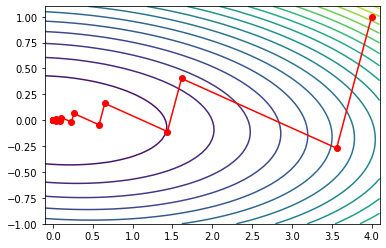

In [7]:
fig = plt.figure()

xmin = -0.1
xmax = 4.1
ymin = -1
ymax = 1.1
x1 = np.linspace(xmin, xmax, 50)
x2 = np.linspace(ymin, ymax, 50)

X, Y = np.meshgrid(x1, x2)
Z = fplot(X, Y)

plt.axis([xmin, xmax, ymin, ymax], "equal")
plt.contour(X, Y, Z, 20)

xiter = [iterates[k][0] for k in range(len(iterates))]
yiter = [iterates[k][1] for k in range(len(iterates))]
plt.plot(xiter, yiter, color='r', marker='o')
plt.show()

We then apply the algorithm using the following preconditioner: \\[ D= \left( \begin{array}{cc} 1 & 0 \\ 0 & \frac{1}{10} \end{array}\right).\\]

In [8]:
D = np.array([[1, 0], [0, 1/10]])
iterates, message = preconditionedSteepestDescent(fct, x0, D, eps)
print(message)
print(f'Number of iterations: {len(iterates) - 1}')

Required precision has been reached: 8.670456111480758e-08 <= 1e-07
Number of iterations: 7


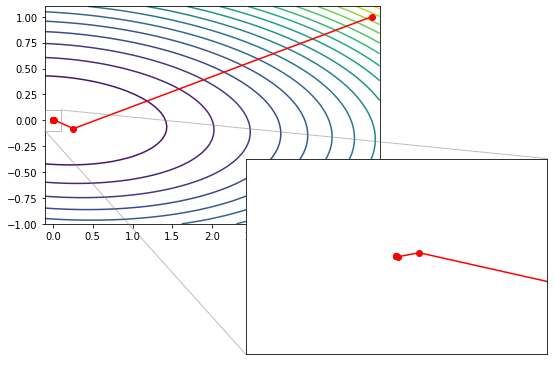

In [9]:
fig = plt.figure()

xmin = -0.1
xmax = 4.1
ymin = -1
ymax = 1.1
x1 = np.linspace(xmin, xmax, 50)
x2 = np.linspace(ymin, ymax, 50)

X, Y = np.meshgrid(x1, x2)
Z = fplot(X, Y)

plt.axis([xmin, xmax, ymin, ymax], "equal")
plt.contour(X, Y, Z, 20)

xiter = [iterates[k][0] for k in range(len(iterates))]
yiter = [iterates[k][1] for k in range(len(iterates))]
plt.plot(xiter, yiter, color='r', marker='o')

# Generate a zoom close to the solution
ax = plt.gca()
axins = ax.inset_axes([0.6, -0.6, 0.9, 0.9])
axins.plot(xiter, yiter, color='r', marker='o')
axins.set_xlim([-0.1, 0.1])
axins.set_ylim([-0.1, 0.1])
# Reove the ticks on the zoomed plot
axins.xaxis.set_major_locator(plt.NullLocator())
axins.yaxis.set_major_locator(plt.NullLocator())
ax.indicate_inset_zoom(axins)
plt.show()

We observe that the number of iterations has significantly decreased. Moreover, the "zigzag" of the iterations has almost disappeared.

We know use
the matrix \\[ D = \frac{1}{43} \left( \begin{array}{cc} 22&-1 \\ -1&2 \end{array} \right), \\] as preconditioner.

In [10]:
D = np.array([[22/43, -1/43], [-1/43, 2/43]])
iterates, message = preconditionedSteepestDescent(fct, x0, D, eps)
print(message)
print(f'Number of iterations: {len(iterates) - 1}')

Required precision has been reached: 0.0 <= 1e-07
Number of iterations: 1


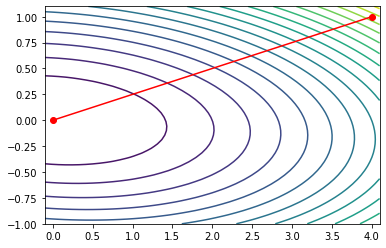

In [11]:
fig = plt.figure()

xmin = -0.1
xmax = 4.1
ymin = -1
ymax = 1.1
x1 = np.linspace(xmin, xmax, 50)
x2 = np.linspace(ymin, ymax, 50)

X, Y = np.meshgrid(x1, x2)
Z = fplot(X, Y)

plt.axis([xmin, xmax, ymin, ymax], "equal")
plt.contour(X, Y, Z, 20)

xiter = [iterates[k][0] for k in range(len(iterates))]
yiter = [iterates[k][1] for k in range(len(iterates))]
plt.plot(xiter, yiter, color='r', marker='o')
plt.show()

The algorithm converges in one iteration. The preconditioner happens to be inverse of the second derivatives matrix.